# EDA

## Importar las librerías necesarias.

In [1]:
import pandas as pd 
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

## Cargar los datos

In [2]:
df = pd.read_csv('df_modificada.csv', low_memory=False)
df.sample(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
22500,['Divergent Collection'],85000000.0,"['Adventure', 'Action', 'Science Fiction']",157350,en,In a world divided into factions based on pers...,21.572585,"['Summit Entertainment', 'Red Wagon Entertainm...",['United States of America'],2014-03-14,288747895.0,139.0,['English'],Released,What makes you different makes you dangerous.,Divergent,6.9,2014.0,3.397034
29078,[],0.0,"['Drama', 'Crime']",126883,es,Five juvenile delinquents break out of jail an...,0.053178,['La Unión de los Ríos'],['Argentina'],2012-10-04,0.0,130.0,['Español'],Released,NaN,The Wild Ones,5.0,2012.0,0.000000


## Colecta y validación de datos

### Tipo de dato de las variables

In [3]:
df.dtypes

belongs_to_collection     object
budget                   float64
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
release_year             float64
return                   float64
dtype: object

In [4]:
# Cambiamos el tipo de dato de la columna "popularity" de objeto a numérico
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

### Cantidad de variables, según cada tipo de dato

In [5]:
df.dtypes.value_counts()

object     12
float64     7
Name: count, dtype: int64

### Cantidad de variables y observaciones

In [6]:
df.shape

(45379, 19)

### Cantidad de observaciones con valores nulos por variable

In [7]:
# Calculamos en número de celdas vacías en cada colummna.
datos_faltantes = df.isnull().sum().to_frame()
datos_faltantes = datos_faltantes.rename(columns= {0: " Celdas Vacías"})
datos_faltantes

,Celdas Vacías
belongs_to_collection,0
budget,3
genres,0
id,0
original_language,11
overview,941
popularity,3
production_companies,0
production_countries,0
release_date,3


### Cantidad de valores nulos en total

In [8]:
df.isnull().sum().sum()

26283

### Proporción de valores nulos por cada variable

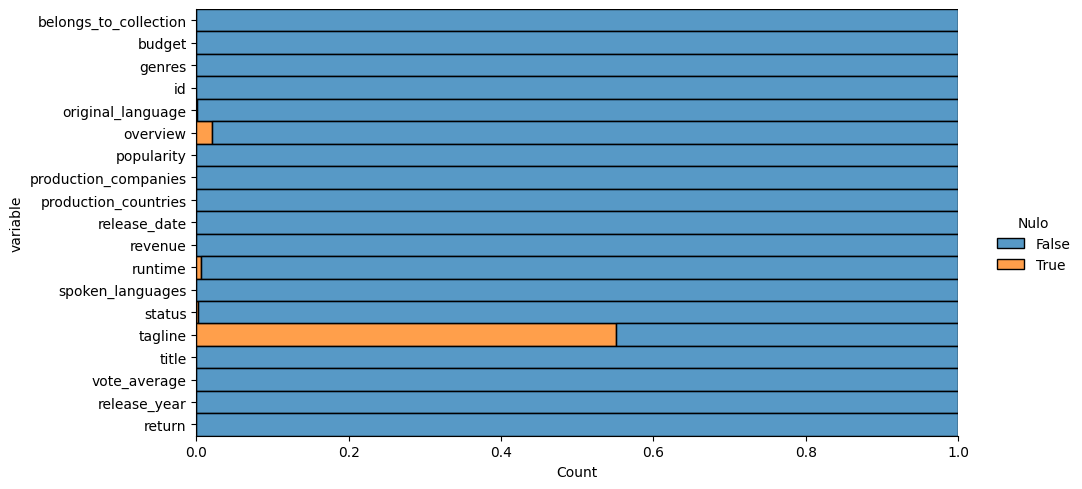

In [9]:
missing_data = df.isnull().stack().reset_index().rename(columns={"level_1": "variable", 0: "Nulo"})
sns.displot(data=missing_data, y="variable", hue="Nulo", multiple="fill", aspect=2)

### Visualizar los valores nulos en todo el conjunto de datos

<Axes: >

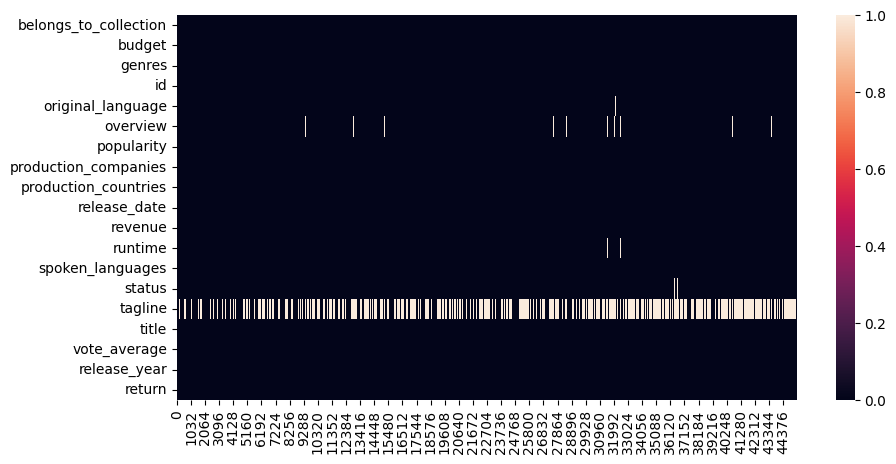

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull().transpose(), ax=ax)

### Visualizamos la correlación de nulidad entre las variables.

<Axes: >

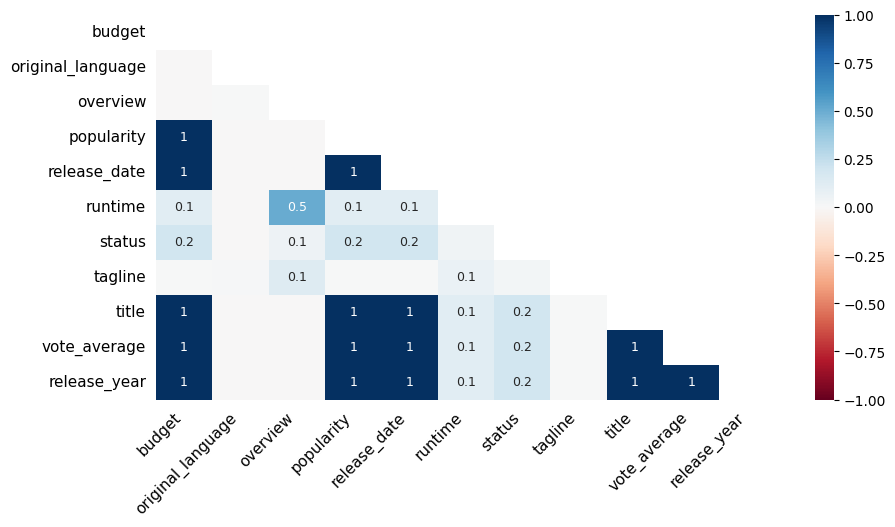

In [11]:
msno.heatmap(df, figsize=(10,5), fontsize=11)

### Eliminamos los valores nulos

In [12]:
# La columna 'tagline' tiene cerca del 60% de valores nulos 
df = df.drop('tagline', axis=1)

In [13]:
# La proporción de valores nulos por cada variable, representan menos del 2.5% 
df = df.dropna(axis=0)
df.shape

(44361, 18)

### Cantidad de filas duplicadas

In [14]:
duplicados = df.duplicated(keep=False).sum()
print('Cantidad de filas duplicadas:', duplicados)

Cantidad de filas duplicadas: 33


### Eliminamos filas duplicadas

In [15]:
df = df.drop_duplicates()
df.shape

(44344, 18)

## Conteos y proporciones

### Estadísticos que describen el conjunto de datos:
### - Numéricas

In [16]:
descripcion = df.describe().round(2).applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)
descripcion

,budget,popularity,revenue,runtime,vote_average,release_year,return
count,44344.00,44344.00,44344.00,44344.00,44344.00,44344.00,44344.00
mean,4326716.93,2.98,11489573.43,95.06,5.65,1991.79,inf
std,17629058.44,6.07,65112066.51,37.49,1.89,24.14,nan
min,0.00,0.00,0.00,0.00,0.00,1874.00,0.00
25%,0.00,0.41,0.00,85.00,5.00,1978.00,0.00
50%,0.00,1.17,0.00,95.00,6.00,2001.00,0.00
75%,0.00,3.82,0.00,107.00,6.80,2010.00,0.00
max,380000000.00,547.49,2787965087.00,1256.00,10.00,2020.00,inf


### Diagrama de caja / boxplot

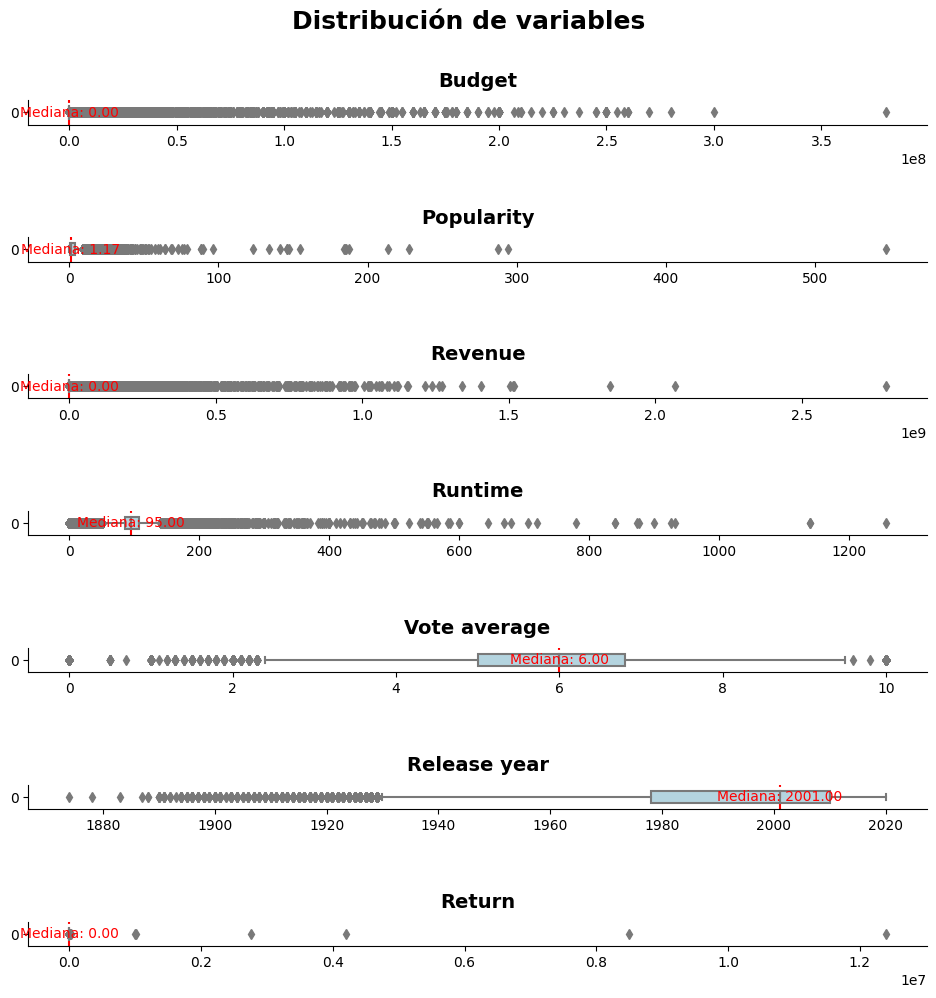

In [17]:
# Variables que deseas incluir en el diagrama de cajas
variables = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'release_year', 'return']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=len(variables), figsize=(10, 10))

# Generar el diagrama de caja para cada variable
for i, variable in enumerate(variables):
    sns.boxplot(data=df[variable], ax=axes[i], orient='h', color='lightblue', width=0.5, linewidth=1.5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(variable.capitalize().replace('_', ' '), fontsize=14, fontweight='bold', pad=10)

    # Añadir una línea vertical en la mediana
    median = df[variable].median()
    axes[i].axvline(median, color='red', linestyle='--', linewidth=1.5)

    # Añadir texto con la mediana
    axes[i].text(median, 0.5, f'Mediana: {median:.2f}', transform=axes[i].get_xaxis_transform(), ha='center', va='center', color='red', fontsize=10)

# Ajustar el espaciado entre subplots
fig.tight_layout(pad=3)

# Añadir un título a la figura
fig.suptitle('Distribución de variables', fontsize=18, fontweight='bold', y=1.02)

# Mostrar los gráficos
plt.show()

> Vamos a trabajar solo con la variable numérica: ***'vote_average'***

In [18]:
# Eliminamos las variables que no vamos a considerar en el modelo
df = df.drop(['budget', 'popularity', 'revenue', 'runtime', 'release_year', 'return'], axis=1)

### - Categóricas

In [19]:
df.describe(include=object)

,belongs_to_collection,genres,id,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,title
count,44344,44344,44344,44344,44344,44344,44344,44344,44344,44344,44344
unique,1674,4044,44331,89,44160,22397,2364,17174,1834,6,41236
top,[],['Drama'],14788,en,No overview found.,[],['United States of America'],2008-01-01,['English'],Released,Cinderella
freq,39917,4902,2,32062,133,11178,17796,134,22298,44004,11


In [20]:
# Eliminamos las variables que no vamos a considerar en el modelo
df = df.drop(['belongs_to_collection','id','original_language','production_countries','release_date','status','overview','production_companies'], axis=1)

In [21]:
df.head()

,genres,spoken_languages,title,vote_average
0,"['Animation', 'Comedy', 'Family']",['English'],Toy Story,7.7
1,"['Adventure', 'Fantasy', 'Family']","['English', 'Français']",Jumanji,6.9
2,"['Romance', 'Comedy']",['English'],Grumpier Old Men,6.5
3,"['Comedy', 'Drama', 'Romance']",['English'],Waiting to Exhale,6.1
4,['Comedy'],['English'],Father of the Bride Part II,5.7
